In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
# Load the dataset
data = pd.read_csv('/Users/cheryl/Downloads/auto-mpg.csv')

# Preview the data
print(data.head())


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [4]:
# Drop the 'car name' column
data = data.drop(columns=['car name'])

In [5]:
# Check the data types
print(data.dtypes)

# Replace '?' with NaN in the horsepower column and convert it to float
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

# Fill missing values with the column mean
data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)

# Check for remaining missing values
print(data.isnull().sum())

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64


In [6]:
# Create dummy variables for the 'origin' column
data = pd.get_dummies(data, columns=['origin'], drop_first=True)

# Preview the transformed data
print(data.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin_2  origin_3  
0          70         0         0  
1          70         0         0  
2          70         0         0  
3          70         0         0  
4          70         0         0  


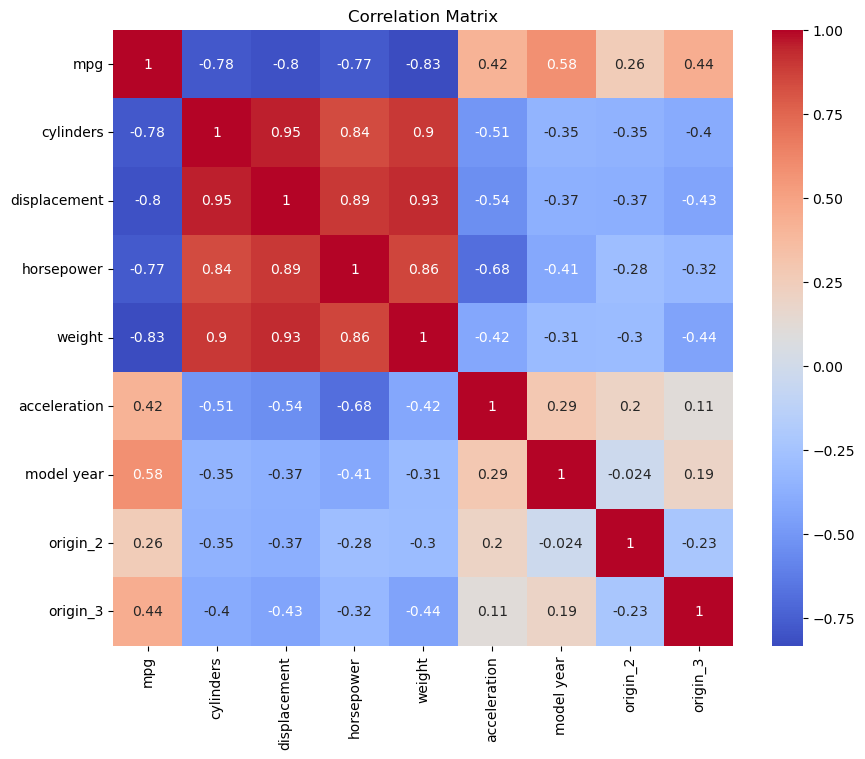

mpg             1.000000
model year      0.579267
origin_3        0.442174
acceleration    0.420289
origin_2        0.259022
horsepower     -0.771437
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64


In [7]:
# Correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Check correlation of mpg with other features
print(corr_matrix['mpg'].sort_values(ascending=False))

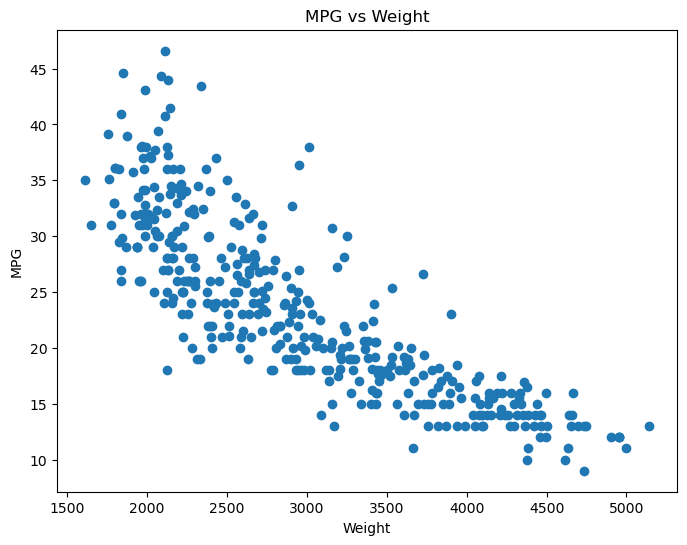

In [8]:
# Plot mpg versus weight
plt.figure(figsize=(8,6))
plt.scatter(data['weight'], data['mpg'])
plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

In [9]:
# Define the target and features
X = data.drop(columns=['mpg'])
y = data['mpg']

# Split data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Calculate metrics for training and test sets
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

train_rmse, train_mae, train_r2 = evaluate_model(y_train, y_train_pred)
test_rmse, test_mae, test_r2 = evaluate_model(y_test, y_test_pred)

# Print results
print(f"Training Set: RMSE: {train_rmse}, MAE: {train_mae}, R²: {train_r2}")
print(f"Test Set: RMSE: {test_rmse}, MAE: {test_mae}, R²: {test_r2}")

Training Set: RMSE: 3.3702735639389054, MAE: 2.6054846937710363, R²: 0.8188288951042786
Test Set: RMSE: 2.8877573478836323, MAE: 2.287586770442108, R²: 0.8449006123776615


In [11]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Calculate metrics for Ridge Regression
train_rmse_ridge, train_mae_ridge, train_r2_ridge = evaluate_model(y_train, y_train_pred_ridge)
test_rmse_ridge, test_mae_ridge, test_r2_ridge = evaluate_model(y_test, y_test_pred_ridge)

# Print results for Ridge Regression
print(f"Ridge - Training Set: RMSE: {train_rmse_ridge}, MAE: {train_mae_ridge}, R²: {train_r2_ridge}")
print(f"Ridge - Test Set: RMSE: {test_rmse_ridge}, MAE: {test_mae_ridge}, R²: {test_r2_ridge}")

Ridge - Training Set: RMSE: 3.3706242194288163, MAE: 2.6047184780229076, R²: 0.8187911937448994
Ridge - Test Set: RMSE: 2.8889456216077076, MAE: 2.291582929683247, R²: 0.844772943447532
